# 4. Modeling and Hyperparameter Tuning

## 4.1. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import EarlyStopping

from joblib import dump,load

import warnings
warnings.filterwarnings('ignore') # removes warnings for no penalty in logisitic regression

In [2]:
# Training data
X_train = pd.read_csv('./Data/X_train.csv',index_col=0)
y_train = pd.read_csv('./Data/y_train.csv',index_col=0)

In [3]:
# Test data
X_test = pd.read_csv('./Data/X_test.csv',index_col=0)
y_test = pd.read_csv('./Data/y_test.csv',index_col=0)

## 4.2. Train and Validation Split

In [4]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,stratify=y_train,test_size=0.2,random_state=42)

In [5]:
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)

In [6]:
# Cross-validator
skf = StratifiedKFold(10,shuffle=True,random_state=42)

## 4.3. Basic Modeling

As a baseline, we will perform binary classification with these four algorithms: 
1. Logistic regression
2. K-nearest neighbors
3. Random forest
4. Support vector machine
5. Naive Bayes

#### 1. Logistic regression

In [7]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
cross_val_score(logmodel,X_train,y_train.values.ravel(),cv=skf,scoring='f1').mean()

0.534877344877345

In [9]:
predictions = logmodel.predict(X_val)

In [10]:
print(confusion_matrix(y_val,predictions))

[[422   3]
 [  9   8]]


In [11]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       425
           1       0.73      0.47      0.57        17

    accuracy                           0.97       442
   macro avg       0.85      0.73      0.78       442
weighted avg       0.97      0.97      0.97       442



#### 2. K-nearest neighbors

In [12]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [13]:
cross_val_score(knn,X_train,y_train.values.ravel(),cv=skf,scoring='f1').mean()

0.4758003108003107

In [14]:
predictions = knn.predict(X_val)

In [15]:
print(confusion_matrix(y_val,predictions))

[[422   3]
 [  8   9]]


In [16]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       425
           1       0.75      0.53      0.62        17

    accuracy                           0.98       442
   macro avg       0.87      0.76      0.80       442
weighted avg       0.97      0.98      0.97       442



#### 3. Random forest

In [17]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
cross_val_score(rfc,X_train,y_train.values.ravel(),cv=skf,scoring='f1').mean()

0.5046464646464646

In [19]:
predictions = rfc.predict(X_val)

In [20]:
print(confusion_matrix(y_val,predictions))

[[424   1]
 [  9   8]]


In [21]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       425
           1       0.89      0.47      0.62        17

    accuracy                           0.98       442
   macro avg       0.93      0.73      0.80       442
weighted avg       0.98      0.98      0.97       442



#### 4. Support vector machine

In [22]:
svc_model = SVC()
svc_model.fit(X_train,y_train.values.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
cross_val_score(svc_model,X_train,y_train.values.ravel(),cv=skf,scoring='f1').mean()

0.44455433455433446

In [24]:
predictions = svc_model.predict(X_val)

In [25]:
print(confusion_matrix(y_val,predictions))

[[424   1]
 [ 11   6]]


In [26]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       425
           1       0.86      0.35      0.50        17

    accuracy                           0.97       442
   macro avg       0.92      0.68      0.74       442
weighted avg       0.97      0.97      0.97       442



#### 5. Naive Bayes

In [27]:
gnb = GaussianNB()
gnb.fit(X_train,y_train.values.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [28]:
cross_val_score(gnb,X_train,y_train.values.ravel(),cv=skf,scoring='f1').mean()

0.5110193785116385

In [29]:
predictions = gnb.predict(X_val)

In [30]:
print(confusion_matrix(y_val,predictions))

[[404  21]
 [  3  14]]


In [31]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       425
           1       0.40      0.82      0.54        17

    accuracy                           0.95       442
   macro avg       0.70      0.89      0.75       442
weighted avg       0.97      0.95      0.95       442



Generally, most of our baseline algorithms performed fairly well from an accuracy standpoint. Aside from the gnb model, all of the other models present more type-2 errors than type-1 errors. This result makes sense since the more conservative approach is to predict false negatives at a higher rate. 

## 4.4. Basic Modeling - Hyperparameter Tuning

We will use GridSearchCV to tune the hyperparemeters of the models from the previous section. Model selection will be based on f1-score so that we tune models to have more balanced performance

#### 1. Logistic regression

In [32]:
parameters = {'solver':('newton-cg','lbfgs','liblinear','sag','saga'),'penalty':('none','l1','l2','elasticnet'),'C':(100,10,1,0.1,0.01)}

In [33]:
logmodel_options = GridSearchCV(LogisticRegression(),parameters,scoring='f1')
logmodel_options.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (100, 10, 1, 0.1, 0.01),
                         'penalty': ('none', 'l1', 'l2', 'elasticnet'),
                         'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='

In [34]:
# Highest mean f1-score out of all models
logmodel_options.best_score_

0.5716982720760833

In [35]:
# Model with highest score
logmodel_tuned = logmodel_options.best_estimator_

In [36]:
logmodel_tuned

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
predictions = logmodel_tuned.predict(X_val)

In [38]:
print(confusion_matrix(y_val,predictions))

[[422   3]
 [ 10   7]]


In [39]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       425
           1       0.70      0.41      0.52        17

    accuracy                           0.97       442
   macro avg       0.84      0.70      0.75       442
weighted avg       0.97      0.97      0.97       442



#### 2. K-nearest neighbors

In [40]:
parameters = {'n_neighbors':range(1,21)}

In [41]:
knn_options = GridSearchCV(KNeighborsClassifier(),parameters,scoring='f1')
knn_options.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 21)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='f1', verbose=0)

In [42]:
# Highest mean f1-score out of all models
knn_options.best_score_

0.5935238095238097

In [43]:
# Model with highest score
knn_tuned = knn_options.best_estimator_

In [44]:
knn_tuned

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [45]:
predictions = knn_tuned.predict(X_val)

In [46]:
print(confusion_matrix(y_val,predictions))

[[421   4]
 [  7  10]]


In [47]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       425
           1       0.71      0.59      0.65        17

    accuracy                           0.98       442
   macro avg       0.85      0.79      0.82       442
weighted avg       0.97      0.98      0.97       442



#### 3. Random forest

In [208]:
parameters = {'max_features':range(1,21),'max_features':('sqrt','log2'),'n_estimators':(10,100,400,500,1000)}

In [209]:
rfc_options = GridSearchCV(RandomForestClassifier(),parameters,scoring='f1')
rfc_options.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [210]:
# Highest mean f1-score out of all models
rfc_options.best_score_

0.5288321814637603

In [211]:
# Model with highest score
rfc_tuned = rfc_options.best_estimator_

In [212]:
rfc_tuned

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [213]:
predictions = rfc_tuned.predict(X_val)

In [214]:
print(confusion_matrix(y_val,predictions))

[[424   1]
 [  9   8]]


In [215]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       425
           1       0.89      0.47      0.62        17

    accuracy                           0.98       442
   macro avg       0.93      0.73      0.80       442
weighted avg       0.98      0.98      0.97       442



#### 4. Support vector machine

In [216]:
parameters = {'kernel':('linear','poly','rbf','sigmoid'),'C':(100,10,1,0.1,0.001)}

In [217]:
svc_model_options = GridSearchCV(SVC(),parameters,scoring='f1')
svc_model_options.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (100, 10, 1, 0.1, 0.001),
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [218]:
# Highest mean f1-score out of all models
svc_model_options.best_score_

0.5993704505213457

In [219]:
# Model with highest score
svc_model_tuned = svc_model_options.best_estimator_

In [220]:
svc_model_tuned

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [221]:
predictions = svc_model_tuned.predict(X_val)

In [222]:
print(confusion_matrix(y_val,predictions))

[[419   6]
 [  6  11]]


In [223]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       425
           1       0.65      0.65      0.65        17

    accuracy                           0.97       442
   macro avg       0.82      0.82      0.82       442
weighted avg       0.97      0.97      0.97       442



#### 5. Naive Bayes

GaussianNB cannot be easily tuned, so we will have to stick with the standard model. Its initial performance was not very impressive, but it could offer some value in model ensembling. In fact, we should have expected poor initial performance since the effect of each feature is not independent. 

Although some tuned models performed slightly worse on the validation data than their corresponding standard models, we should have confidence that they will perform better under most circumstances. The size of the validation data set is not particularly large. 

## 4.5. Advanced Modeling - Ensemble Methods

One of the best ways to overcome imbalanced data is through implementing ensemble methods. We will experiment with both bagging and boosting to see if we can further improve our predictions. 

### Bagging

#### 1. Logistic regression

In [224]:
logmodel_bagged = BaggingClassifier(base_estimator=LogisticRegression(penalty='none',C=100,solver='lbfgs')).fit(X_train,y_train.values.ravel())

In [225]:
cross_val_score(logmodel_bagged,X_train,y_train.values.ravel(),cv=skf,scoring='f1').mean()

0.5387357087357088

In [226]:
predictions = logmodel_bagged.predict(X_val)

In [227]:
print(confusion_matrix(y_val,predictions))

[[422   3]
 [  9   8]]


In [228]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       425
           1       0.73      0.47      0.57        17

    accuracy                           0.97       442
   macro avg       0.85      0.73      0.78       442
weighted avg       0.97      0.97      0.97       442



#### 2. K-nearest neighbors

In [229]:
knn_bagged = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3)).fit(X_train,y_train.values.ravel())

In [230]:
cross_val_score(knn_bagged,X_train,y_train.values.ravel(),cv=skf,scoring='f1').mean()

0.5695912420912421

In [231]:
predictions = knn_bagged.predict(X_val)

In [232]:
print(confusion_matrix(y_val,predictions))

[[422   3]
 [  7  10]]


In [233]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       425
           1       0.77      0.59      0.67        17

    accuracy                           0.98       442
   macro avg       0.88      0.79      0.83       442
weighted avg       0.98      0.98      0.98       442



#### 3. Random forest

In [234]:
rfc_bagged = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=500,max_features='sqrt')).fit(X_train,y_train.values.ravel())

In [235]:
cross_val_score(rfc_bagged,X_train,y_train.values.ravel(),cv=skf,scoring='f1').mean()

0.4978787878787879

In [236]:
predictions = rfc_bagged.predict(X_val)

In [237]:
print(confusion_matrix(y_val,predictions))

[[425   0]
 [ 10   7]]


In [238]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       425
           1       1.00      0.41      0.58        17

    accuracy                           0.98       442
   macro avg       0.99      0.71      0.79       442
weighted avg       0.98      0.98      0.97       442



#### 4. Support vector machine

In [239]:
svc_bagged = BaggingClassifier(base_estimator=SVC(C=10,kernel='poly')).fit(X_train,y_train.values.ravel())

In [240]:
cross_val_score(svc_bagged,X_train,y_train.values.ravel(),cv=skf,scoring='f1').mean()

0.6144488844488845

In [241]:
predictions = svc_bagged.predict(X_val)

In [242]:
print(confusion_matrix(y_val,predictions))

[[420   5]
 [  9   8]]


In [243]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       425
           1       0.62      0.47      0.53        17

    accuracy                           0.97       442
   macro avg       0.80      0.73      0.76       442
weighted avg       0.97      0.97      0.97       442



#### 5. Naive Bayes

In [244]:
gnb_bagged = BaggingClassifier(base_estimator=GaussianNB()).fit(X_train,y_train.values.ravel())

In [245]:
cross_val_score(gnb_bagged,X_train,y_train.values.ravel(),cv=skf,scoring='f1').mean()

0.5013913662826706

In [246]:
predictions = gnb_bagged.predict(X_val)

In [247]:
print(confusion_matrix(y_val,predictions))

[[406  19]
 [  3  14]]


In [248]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       425
           1       0.42      0.82      0.56        17

    accuracy                           0.95       442
   macro avg       0.71      0.89      0.77       442
weighted avg       0.97      0.95      0.96       442



None of these bagged classifiers necessarily perform better than when they are unbagged.

### Boosting

In this subsection, we will introduce three new boosted classifiers.

#### 1. AdaBoost 

In [249]:
ada = AdaBoostClassifier().fit(X_train,y_train.values.ravel())

In [250]:
cross_val_score(ada,X_train,y_train.values.ravel(),cv=skf,scoring='f1').mean()

0.4417765567765567

In [251]:
predictions = ada.predict(X_val)

In [252]:
print(confusion_matrix(y_val,predictions))

[[422   3]
 [  6  11]]


In [253]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       425
           1       0.79      0.65      0.71        17

    accuracy                           0.98       442
   macro avg       0.89      0.82      0.85       442
weighted avg       0.98      0.98      0.98       442



#### 2. Gradient tree boosting

In [254]:
gbc = GradientBoostingClassifier().fit(X_train,y_train.values.ravel())

In [255]:
cross_val_score(gbc,X_train,y_train.values.ravel(),cv=skf,scoring='f1').mean()

0.5275213675213675

In [256]:
predictions = gbc.predict(X_val)

In [257]:
print(confusion_matrix(y_val,predictions))

[[423   2]
 [  8   9]]


In [258]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       425
           1       0.82      0.53      0.64        17

    accuracy                           0.98       442
   macro avg       0.90      0.76      0.82       442
weighted avg       0.98      0.98      0.98       442



#### 3. XGBoost

In [259]:
xgb = XGBClassifier().fit(X_train,y_train.values.ravel())

In [260]:
cross_val_score(xgb,X_train,y_train.values.ravel(),cv=skf,scoring='f1').mean()

0.6115873015873015

In [261]:
predictions = xgb.predict(X_val)

In [262]:
print(confusion_matrix(y_val,predictions))

[[423   2]
 [  9   8]]


In [263]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       425
           1       0.80      0.47      0.59        17

    accuracy                           0.98       442
   macro avg       0.89      0.73      0.79       442
weighted avg       0.97      0.98      0.97       442



All three of these algorithms perform well without hyperparameter tuning. These results are fairly promising. 

## 4.6. Advanced Modeling - Hyperparameter Tuning

### Bagging

In [435]:
# Hyperparameters for BaggingClassifier
parameters = {'n_estimators':(1,10,25,50,100)}

#### 1. Logistic regression

In [294]:
logmodel_bagged_options = GridSearchCV(BaggingClassifier(base_estimator=LogisticRegression(penalty='none',C=100,solver='lbfgs')),parameters,scoring='f1')
logmodel_bagged_options.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=BaggingClassifier(base_estimator=LogisticRegression(C=100,
                                                                           class_weight=None,
                                                                           dual=False,
                                                                           fit_intercept=True,
                                                                           intercept_scaling=1,
                                                                           l1_ratio=None,
                                                                           max_iter=100,
                                                                           multi_class='auto',
                                                                           n_jobs=None,
                                                                           penalty='none',
                                                      

In [295]:
# Highest mean f1-score out of all models
logmodel_bagged_options.best_score_

0.5722953761214631

In [296]:
# Model with highest score
logmodel_bagged_tuned = logmodel_bagged_options.best_estimator_

In [297]:
logmodel_bagged_tuned

BaggingClassifier(base_estimator=LogisticRegression(C=100, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='none',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=Non

In [298]:
predictions = logmodel_bagged_tuned.predict(X_val)

In [299]:
print(confusion_matrix(y_val,predictions))

[[422   3]
 [  8   9]]


In [300]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       425
           1       0.75      0.53      0.62        17

    accuracy                           0.98       442
   macro avg       0.87      0.76      0.80       442
weighted avg       0.97      0.98      0.97       442



#### 2. K-nearest neighbors

In [322]:
knn_bagged_options = GridSearchCV(BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3)),parameters,scoring='f1')
knn_bagged_options.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                                             leaf_size=30,
                                                                             metric='minkowski',
                                                                             metric_params=None,
                                                                             n_jobs=None,
                                                                             n_neighbors=3,
                                                                             p=2,
                                                                             weights='uniform'),
                                         bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                    

In [323]:
# Highest mean f1-score out of all models
knn_bagged_options.best_score_

0.6061152882205514

In [324]:
# Model with highest score
knn_bagged_tuned = knn_bagged_options.best_estimator_

In [325]:
knn_bagged_tuned

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=3, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=100, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [326]:
predictions = knn_bagged_tuned.predict(X_val)

In [327]:
print(confusion_matrix(y_val,predictions))

[[421   4]
 [  7  10]]


In [328]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       425
           1       0.71      0.59      0.65        17

    accuracy                           0.98       442
   macro avg       0.85      0.79      0.82       442
weighted avg       0.97      0.98      0.97       442



#### 3. Random forest

In [329]:
rfc_bagged_options = GridSearchCV(BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=500,max_features='sqrt')),{'n_estimators':(1,5,10)},scoring='f1')
rfc_bagged_options.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                                               ccp_alpha=0.0,
                                                                               class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=None,
                                                                               max_features='sqrt',
                                                                               max_leaf_nodes=None,
                                                                               max_samples=None,
                                                                               min_impurity_decrease=0.0,
                                                                               

In [330]:
# Highest mean f1-score out of all models
rfc_bagged_options.best_score_

0.528972073677956

In [331]:
# Model with highest score
rfc_bagged_tuned = rfc_bagged_options.best_estimator_

In [332]:
rfc_bagged_tuned

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='sqrt',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
     

In [333]:
predictions = rfc_bagged_tuned.predict(X_val)

In [334]:
print(confusion_matrix(y_val,predictions))

[[425   0]
 [ 10   7]]


In [335]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       425
           1       1.00      0.41      0.58        17

    accuracy                           0.98       442
   macro avg       0.99      0.71      0.79       442
weighted avg       0.98      0.98      0.97       442



#### 4. Support vector machine

In [520]:
svc_bagged_options = GridSearchCV(BaggingClassifier(base_estimator=SVC(C=10,kernel='poly')),parameters,scoring='f1')
svc_bagged_options.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=BaggingClassifier(base_estimator=SVC(C=10,
                                                            break_ties=False,
                                                            cache_size=200,
                                                            class_weight=None,
                                                            coef0=0.0,
                                                            decision_function_shape='ovr',
                                                            degree=3,
                                                            gamma='scale',
                                                            kernel='poly',
                                                            max_iter=-1,
                                                            probability=False,
                                                            random_state=None,
                                                 

In [521]:
# Highest mean f1-score out of all models
svc_bagged_options.best_score_

0.6350317304179196

In [522]:
# Model with highest score
svc_bagged_tuned = svc_bagged_options.best_estimator_

In [523]:
svc_bagged_tuned

BaggingClassifier(base_estimator=SVC(C=10, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='poly', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=25, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [524]:
predictions = svc_bagged_tuned.predict(X_val)

In [525]:
print(confusion_matrix(y_val,predictions))

[[421   4]
 [  7  10]]


In [526]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       425
           1       0.71      0.59      0.65        17

    accuracy                           0.98       442
   macro avg       0.85      0.79      0.82       442
weighted avg       0.97      0.98      0.97       442



#### 5. Naive Bayes

In [371]:
gnb_bagged_options = GridSearchCV(BaggingClassifier(base_estimator=GaussianNB()),parameters,scoring='f1')
gnb_bagged_options.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=BaggingClassifier(base_estimator=GaussianNB(priors=None,
                                                                   var_smoothing=1e-09),
                                         bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=None,
                                         verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'n_estimators': (1, 10, 25, 50, 100)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [372]:
# Highest mean f1-score out of all models
gnb_bagged_options.best_score_

0.49374039902322203

In [373]:
# Model with highest score
gnb_bagged_tuned = gnb_bagged_options.best_estimator_

In [374]:
gnb_bagged_tuned

BaggingClassifier(base_estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=25, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [375]:
predictions = gnb_bagged_tuned.predict(X_val)

In [376]:
print(confusion_matrix(y_val,predictions))

[[402  23]
 [  3  14]]


In [377]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       425
           1       0.38      0.82      0.52        17

    accuracy                           0.94       442
   macro avg       0.69      0.88      0.74       442
weighted avg       0.97      0.94      0.95       442



### Boosting

#### 1. AdaBoost

In [378]:
parameters = {'n_estimators':(10,25,50,100,200,500),'learning_rate':(.25,.5,1,1.5,2)}

In [379]:
ada_options = GridSearchCV(AdaBoostClassifier(),parameters,scoring='f1')
ada_options.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': (0.25, 0.5, 1, 1.5, 2),
                         'n_estimators': (10, 25, 50, 100, 200, 500)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [380]:
# Highest mean f1-score out of all models
ada_options.best_score_

0.5775714285714286

In [381]:
# Model with highest score
ada_tuned = ada_options.best_estimator_

In [382]:
ada_tuned

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=100, random_state=None)

In [383]:
predictions = ada_tuned.predict(X_val)

In [384]:
print(confusion_matrix(y_val,predictions))

[[418   7]
 [  7  10]]


In [385]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       425
           1       0.59      0.59      0.59        17

    accuracy                           0.97       442
   macro avg       0.79      0.79      0.79       442
weighted avg       0.97      0.97      0.97       442



#### 2. Gradient tree boosting

In [386]:
parameters = {'n_estimators':(25,50,100,200,500),'learning_rate':(.05,.1,.15,.2,.25)}

In [387]:
gbc_options = GridSearchCV(GradientBoostingClassifier(),parameters,scoring='f1')
gbc_options.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
      

In [388]:
# Highest mean f1-score out of all models
gbc_options.best_score_

0.6351743095450189

In [389]:
# Model with highest score
gbc_tuned = gbc_options.best_estimator_

In [390]:
gbc_tuned

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [391]:
predictions = gbc_tuned.predict(X_val)

In [392]:
print(confusion_matrix(y_val,predictions))

[[423   2]
 [  8   9]]


In [393]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       425
           1       0.82      0.53      0.64        17

    accuracy                           0.98       442
   macro avg       0.90      0.76      0.82       442
weighted avg       0.98      0.98      0.98       442



#### 3. XGBoost

In [394]:
# Tune scale_pos_weight, learning_rate, max_depth, min_child_weight, gamma, subsample, colsample_bytree, lambda, and alpha

In [395]:
parameters = {'max_depth':(5,6,7),'min_child_weight':(1,2,3),'colsample_bytree':(.6,.8,1),'lambda':(.5,1,1.5),'alpha':(0,.5)}

In [396]:
xgb_options = GridSearchCV(XGBClassifier(scale_pos_weight=25,learning_rate=.1,subsample=.8),parameters,scoring='f1')
xgb_options.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=25, seed=None,
                                     silent=None, subsample=0.8, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': (0, 0.5), 'colsample_bytree': (0.6, 0.8, 1),
                         'lambda': (0.5, 1, 1.5), 'max_depth': (5, 6, 7),
                  

In [397]:
# Highest mean f1-score out of all models
xgb_options.best_score_

0.6585309200603319

In [398]:
# Model with highest score
xgb_tuned = xgb_options.best_estimator_

In [399]:
xgb_tuned

XGBClassifier(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, lambda=0.5,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=2, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=25, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [400]:
predictions = xgb_tuned.predict(X_val)

In [401]:
print(confusion_matrix(y_val,predictions))

[[422   3]
 [  5  12]]


In [402]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       425
           1       0.80      0.71      0.75        17

    accuracy                           0.98       442
   macro avg       0.89      0.85      0.87       442
weighted avg       0.98      0.98      0.98       442



## 4.7. Ensembling Models

Our next step is to ensemble all of the best versions of our models. We will say that the "best" version of a model is the one that had the highest f1-score for the validation data. 

Here are the top models:
- Tuned logistic regression with tuned bagging
- Tuned k-nearest neighbors with tuned bagging
- Tuned random forest
- Tuned support vector machine with tuned bagging
- Naive Bayes with tuned bagging (relatively low accuracy)
- AdaBoost
- Tuned gradient tree boosting
- Tuned XGBoost (top performer)

In [549]:
# Models
clf1 = BaggingClassifier(base_estimator=LogisticRegression(penalty='none',C=100,solver='lbfgs'),n_estimators=10)
clf2 = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),n_estimators=100)
clf3 = RandomForestClassifier(n_estimators=500,max_features='sqrt')
clf4 = BaggingClassifier(base_estimator=SVC(C=10,kernel='poly'),n_estimators=25)
clf5 = BaggingClassifier(base_estimator=GaussianNB(),n_estimators=25)
clf6 = AdaBoostClassifier()
clf7 = GradientBoostingClassifier(learning_rate=.15,n_estimators=500)
clf8 = XGBClassifier(scale_pos_weight=25,learning_rate=.1,subsample=.8,max_depth=6,min_child_weight=2,colsample_bytree=1,gamma=0,reg_lambda=.5,alpha=0)

In [550]:
estimator = []
estimator.append(('lr',clf1))
estimator.append(('knn',clf2))
estimator.append(('rfc',clf3))
estimator.append(('svc',clf4))
estimator.append(('gnb',clf5))
estimator.append(('ada',clf6))
estimator.append(('gbc',clf7))
estimator.append(('xgb',clf8))

### Voting classifier

1. Soft voting classifier

In [586]:
eclf_vc_soft = VotingClassifier(estimators=estimator,voting='soft')

In [587]:
eclf_vc_soft.fit(X_train,y_train)

VotingClassifier(estimators=[('lr',
                              BaggingClassifier(base_estimator=LogisticRegression(C=100,
                                                                                  class_weight=None,
                                                                                  dual=False,
                                                                                  fit_intercept=True,
                                                                                  intercept_scaling=1,
                                                                                  l1_ratio=None,
                                                                                  max_iter=100,
                                                                                  multi_class='auto',
                                                                                  n_jobs=None,
                                                                                  pen

In [588]:
cross_val_score(eclf_vc_soft,X_train,y_train.values.ravel(),cv=skf,scoring='f1').mean()

0.6390032190032191

In [589]:
predictions = eclf_vc_soft.predict(X_val)

In [590]:
print(confusion_matrix(y_val,predictions))

[[421   4]
 [  7  10]]


In [591]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       425
           1       0.71      0.59      0.65        17

    accuracy                           0.98       442
   macro avg       0.85      0.79      0.82       442
weighted avg       0.97      0.98      0.97       442



2. Hard voting classifier

In [411]:
eclf_vc_hard = VotingClassifier(estimators=estimator,voting='hard')

In [412]:
eclf_vc_hard.fit(X_train,y_train)

VotingClassifier(estimators=[('lr',
                              BaggingClassifier(base_estimator=LogisticRegression(C=100,
                                                                                  class_weight=None,
                                                                                  dual=False,
                                                                                  fit_intercept=True,
                                                                                  intercept_scaling=1,
                                                                                  l1_ratio=None,
                                                                                  max_iter=100,
                                                                                  multi_class='auto',
                                                                                  n_jobs=None,
                                                                                  pen

In [413]:
cross_val_score(eclf_vc_hard,X_train,y_train.values.ravel(),cv=skf,scoring='f1').mean()

0.5755128205128204

In [414]:
predictions = eclf_vc_hard.predict(X_val)

In [415]:
print(confusion_matrix(y_val,predictions))

[[422   3]
 [  7  10]]


In [416]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       425
           1       0.77      0.59      0.67        17

    accuracy                           0.98       442
   macro avg       0.88      0.79      0.83       442
weighted avg       0.98      0.98      0.98       442



### Stacking classifier

In [417]:
eclf_sc = StackingClassifier(estimators=estimator)

In [418]:
eclf_sc.fit(X_train,y_train)

StackingClassifier(cv=None,
                   estimators=[('lr',
                                BaggingClassifier(base_estimator=LogisticRegression(C=100,
                                                                                    class_weight=None,
                                                                                    dual=False,
                                                                                    fit_intercept=True,
                                                                                    intercept_scaling=1,
                                                                                    l1_ratio=None,
                                                                                    max_iter=100,
                                                                                    multi_class='auto',
                                                                                    n_jobs=None,
                                     

In [419]:
cross_val_score(eclf_sc,X_train,y_train.values.ravel(),cv=skf,scoring='f1').mean()

0.5795437895437895

In [420]:
predictions = eclf_sc.predict(X_val)

In [421]:
print(confusion_matrix(y_val,predictions))

[[422   3]
 [  7  10]]


In [422]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       425
           1       0.77      0.59      0.67        17

    accuracy                           0.98       442
   macro avg       0.88      0.79      0.83       442
weighted avg       0.98      0.98      0.98       442



## 4.8. Neural Network Modeling - Base Model

We will build basic feed-forward neural networks, one for each k-fold. Each model will contribute to an overall cross-validation score. Furthermore, we will "ensemble" the models by aggregating their predictions on the validation data. 

In [189]:
# Prevents float mismatches during training
tf.keras.backend.set_floatx('float64')

In [190]:
# Determines the number of perceptrons in the input layer
X_train.shape

(1768, 18)

In [191]:
# Objects for cross-validation scoring
out_of_sample_y = [] 
out_of_sample_predictions = []

In [192]:
# Object for validation predictions
validation_predictions = []

In [193]:
# Performing semi-manual cross-validation
for sampling,testing in skf.split(X_train,y_train):
    # Generating in-sample and out-of-sample data
    X_sampling = X_train.iloc[sampling]
    y_sampling = y_train.iloc[sampling].values.ravel()
    X_testing = X_train.iloc[testing]
    y_testing = y_train.iloc[testing].values.ravel()
    
    # Feed-foward neural network
    model = Sequential()

    # input layer
    model.add(Dense(18,activation='relu'))
    # hidden layer
    model.add(Dense(9,activation='relu'))
    # output layer
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam')
    
    # Fitting the model
    model.fit(x=X_sampling,y=y_sampling,epochs=500,validation_data=(X_testing,y_testing),verbose=0)
    
    # Adding predictions for cross-validation score
    predictions = model.predict_classes(X_testing)
    out_of_sample_y.append(y_testing)
    out_of_sample_predictions.append(predictions)
    
    # Adding validation predictions
    predictions = model.predict_classes(X_val)
    validation_predictions.append(predictions)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [194]:
# Cross-validation scoring
sum_f1_score = 0
max_f1_score = 0
for fold1,fold2 in zip(out_of_sample_y,out_of_sample_predictions):
    sum_f1_score += f1_score(fold1,fold2)
    if (f1_score(fold1,fold2)>max_f1_score):
        max_f1_score = f1_score(fold1,fold2)
mean_f1_score = sum_f1_score/10

In [195]:
mean_f1_score

0.5716516816516817

In [196]:
max_f1_score

0.7142857142857143

We will ensemble the validation predictions by taking the mode from all ten models for each instance. 

In [197]:
validation_predictions_final = pd.DataFrame(validation_predictions[0])
for num in range(1,10):
    validation_predictions_final = pd.concat([validation_predictions_final,pd.DataFrame(validation_predictions[num])],axis=1)

In [198]:
validation_predictions_final['Mode'] = validation_predictions_final.mode(axis=1)[0].astype('int')
validation_predictions_final = validation_predictions_final['Mode']

In [199]:
validation_predictions_final.head()

0    0
1    0
2    0
3    0
4    0
Name: Mode, dtype: int32

In [200]:
print(confusion_matrix(y_val,validation_predictions_final))

[[421   4]
 [ 11   6]]


In [201]:
print(classification_report(y_val,validation_predictions_final))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       425
           1       0.60      0.35      0.44        17

    accuracy                           0.97       442
   macro avg       0.79      0.67      0.71       442
weighted avg       0.96      0.97      0.96       442



## 4.9. Neural Network Modeling - Hyperparameter Tuning

Our next task is to refine the model training. It appears that we largely avoided overfitting since the cross-validation and validation f1-scores are similar. However, we can certainly improve performance by tuning hyperparameters.

Here are some of the hyperparameters we will investigate:
- Activation functions
- Dropout layers
- Number of hidden layers
- Perceptron reduction
- Regularization
- Kernel initialization
- Epochs

Note that we will not be able to tune all of the hyperparameters simultaneously. This strategy is not ideal, but it should still be beneficial. In order to save time and resources, we will train using a single model without cross-validation. We will implement early stopping to avoid comparing overfitted models.

In [202]:
# activation function, dropout, regularization, kernel initializer, callbacks, plotting for epochs, etc.
# avoiding overfitting by getting close to validation score

#### Activation functions
It is likely that SELU and LeakyReLU will outperform ReLU. We will try both and select based on the validation-data scoring. 

In [203]:
# Appropriate early stopping
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=25)

1. SELU

In [216]:
# Feed-foward neural network
model = Sequential()

# input layer
model.add(Dense(18,activation='selu'))
# hidden layer
model.add(Dense(9,activation='selu'))
# output layer
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

# Fitting the model
model.fit(x=X_train,y=y_train.values.ravel(),epochs=500,validation_data=(X_val,y_val.values.ravel()),callbacks=[early_stop],verbose=0)

In [217]:
losses = pd.DataFrame(model.history.history)

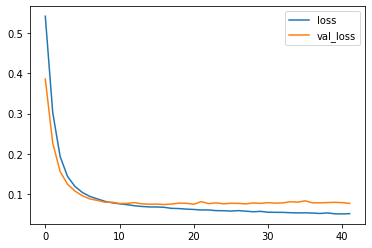

In [218]:
losses.plot()

In [219]:
predictions = model.predict_classes(X_val)

In [220]:
print(confusion_matrix(y_val,predictions))

[[421   4]
 [  6  11]]


In [221]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       425
           1       0.73      0.65      0.69        17

    accuracy                           0.98       442
   macro avg       0.86      0.82      0.84       442
weighted avg       0.98      0.98      0.98       442



2. LeakyReLU

In [222]:
# Feed-foward neural network
model = Sequential()

# input layer
model.add(Dense(18,activation=tf.keras.layers.LeakyReLU()))
# hidden layer
model.add(Dense(9,activation=tf.keras.layers.LeakyReLU()))
# output layer
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

# Fitting the model
model.fit(x=X_train,y=y_train.values.ravel(),epochs=500,validation_data=(X_val,y_val.values.ravel()),callbacks=[early_stop],verbose=0)

In [223]:
losses = pd.DataFrame(model.history.history)

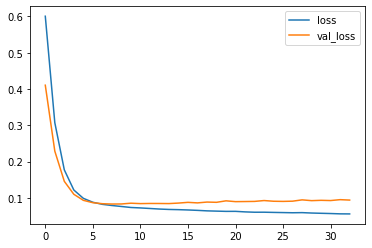

In [224]:
losses.plot()

In [225]:
predictions = model.predict_classes(X_val)

In [226]:
print(confusion_matrix(y_val,predictions))

[[422   3]
 [  9   8]]


In [227]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       425
           1       0.73      0.47      0.57        17

    accuracy                           0.97       442
   macro avg       0.85      0.73      0.78       442
weighted avg       0.97      0.97      0.97       442



We will select SELU. 

#### Dropout layers, number of hidden layers, and perceptron reduction
This section will involve modifying the architecture of the neural network. We will experiment with the number of layers and the makeup of layers.

In [228]:
# Appropriate early stopping
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=250)

1. Adding dropout layers

In [229]:
# Feed-foward neural network
model = Sequential()

# input layer
model.add(Dense(18,activation='selu'))
model.add(Dropout(0.5)) 
# hidden layer
model.add(Dense(9,activation='selu'))
model.add(Dropout(0.5))
# output layer
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

# Fitting the model
model.fit(x=X_train,y=y_train.values.ravel(),epochs=500,validation_data=(X_val,y_val.values.ravel()),verbose=0) # no early stopping needed

In [230]:
losses = pd.DataFrame(model.history.history)

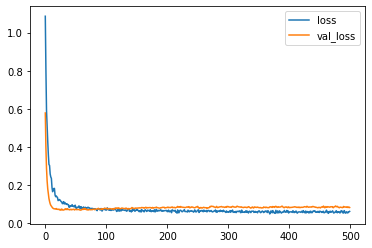

In [231]:
losses.plot()

In [232]:
predictions = model.predict_classes(X_val)

In [233]:
print(confusion_matrix(y_val,predictions))

[[420   5]
 [  8   9]]


In [234]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       425
           1       0.64      0.53      0.58        17

    accuracy                           0.97       442
   macro avg       0.81      0.76      0.78       442
weighted avg       0.97      0.97      0.97       442



2. Number of hidden layers

In [235]:
# Feed-foward neural network
model = Sequential()

# input layer
model.add(Dense(18,activation='selu'))
model.add(Dropout(0.5)) 
# hidden layer
model.add(Dense(12,activation='selu'))
model.add(Dropout(0.5))
# hidden layer
model.add(Dense(6,activation='selu'))
model.add(Dropout(0.5))
# output layer
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

# Fitting the model
model.fit(x=X_train,y=y_train.values.ravel(),epochs=500,validation_data=(X_val,y_val.values.ravel()),callbacks=[early_stop],verbose=0)

In [236]:
losses = pd.DataFrame(model.history.history)

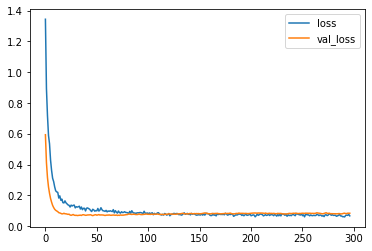

In [237]:
losses.plot()

In [238]:
predictions = model.predict_classes(X_val)

In [239]:
print(confusion_matrix(y_val,predictions))

[[422   3]
 [ 10   7]]


In [240]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       425
           1       0.70      0.41      0.52        17

    accuracy                           0.97       442
   macro avg       0.84      0.70      0.75       442
weighted avg       0.97      0.97      0.97       442



We will stick with one hidden layer. 

3. Perceptron reduction

In [247]:
# Feed-foward neural network
model = Sequential()

# input layer
model.add(Dense(18,activation='selu'))
model.add(Dropout(0.5)) 
# hidden layer
model.add(Dense(12,activation='selu'))
model.add(Dropout(0.5))
# output layer
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

# Fitting the model
model.fit(x=X_train,y=y_train.values.ravel(),epochs=500,validation_data=(X_val,y_val.values.ravel()),verbose=0) # no early stopping needed

In [248]:
losses = pd.DataFrame(model.history.history)

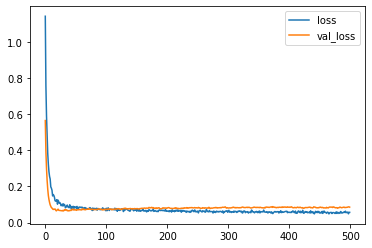

In [249]:
losses.plot()

In [250]:
predictions = model.predict_classes(X_val)

In [251]:
print(confusion_matrix(y_val,predictions))

[[419   6]
 [  6  11]]


In [252]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       425
           1       0.65      0.65      0.65        17

    accuracy                           0.97       442
   macro avg       0.82      0.82      0.82       442
weighted avg       0.97      0.97      0.97       442



A 33% reduction in nodes from the input layer to the hidden layer typically has more balanced performance. We will stick with this change. 

#### Regularization

In [253]:
# Appropriate early stopping
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=250)

1. L1 regularization

In [254]:
# Feed-foward neural network
model = Sequential()

# input layer
model.add(Dense(18,activation='selu',kernel_regularizer='l1'))
model.add(Dropout(0.5)) 
# hidden layer
model.add(Dense(12,activation='selu',kernel_regularizer='l1'))
model.add(Dropout(0.5))
# output layer
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

# Fitting the model
model.fit(x=X_train,y=y_train.values.ravel(),epochs=500,validation_data=(X_val,y_val.values.ravel()),verbose=0) # no early stopping needed

In [255]:
losses = pd.DataFrame(model.history.history)

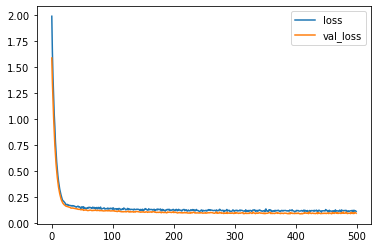

In [256]:
losses.plot()

In [257]:
predictions = model.predict_classes(X_val)

In [258]:
print(confusion_matrix(y_val,predictions))

[[425   0]
 [ 13   4]]


In [259]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       425
           1       1.00      0.24      0.38        17

    accuracy                           0.97       442
   macro avg       0.99      0.62      0.68       442
weighted avg       0.97      0.97      0.96       442



2. L2 regularization

In [260]:
# Feed-foward neural network
model = Sequential()

# input layer
model.add(Dense(18,activation='selu',kernel_regularizer='l2'))
model.add(Dropout(0.5)) 
# hidden layer
model.add(Dense(12,activation='selu',kernel_regularizer='l2'))
model.add(Dropout(0.5))
# output layer
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

# Fitting the model
model.fit(x=X_train,y=y_train.values.ravel(),epochs=500,validation_data=(X_val,y_val.values.ravel()),verbose=0) # no early stopping needed

In [261]:
losses = pd.DataFrame(model.history.history)

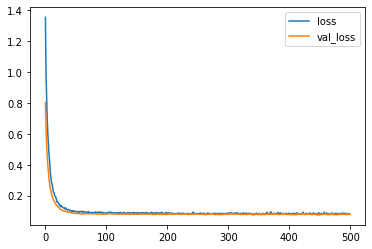

In [262]:
losses.plot()

In [263]:
predictions = model.predict_classes(X_val)

In [264]:
print(confusion_matrix(y_val,predictions))

[[422   3]
 [ 10   7]]


In [265]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       425
           1       0.70      0.41      0.52        17

    accuracy                           0.97       442
   macro avg       0.84      0.70      0.75       442
weighted avg       0.97      0.97      0.97       442



It appears that both L1 and L2 regularization worsen performance, so we will not be including either of them.

#### Kernel Initialization

In [301]:
# Appropriate early stopping
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=100)

1. he_uniform

In [302]:
# Feed-foward neural network
model = Sequential()

# input layer
model.add(Dense(18,activation='selu',kernel_initializer=tf.keras.initializers.he_uniform()))
model.add(Dropout(0.5)) 
# hidden layer
model.add(Dense(12,activation='selu',kernel_initializer=tf.keras.initializers.he_uniform()))
model.add(Dropout(0.5))
# output layer
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

# Fitting the model
model.fit(x=X_train,y=y_train.values.ravel(),epochs=500,validation_data=(X_val,y_val.values.ravel()),callbacks=[early_stop],verbose=0)

In [303]:
losses = pd.DataFrame(model.history.history)

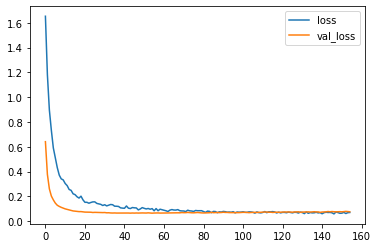

In [304]:
losses.plot()

In [305]:
predictions = model.predict_classes(X_val)

In [306]:
print(confusion_matrix(y_val,predictions))

[[422   3]
 [ 10   7]]


In [307]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       425
           1       0.70      0.41      0.52        17

    accuracy                           0.97       442
   macro avg       0.84      0.70      0.75       442
weighted avg       0.97      0.97      0.97       442



We notice that he_uniform does not overfit as badly as the default glorot_uniform. 

#### Epochs

When we train our models during cross-validation, it would not be good practice to perform early stopping. Therefore, we must find the maximum number of epochs with minimal overfitting during training. 

In [308]:
# Feed-foward neural network
model = Sequential()

# input layer
model.add(Dense(18,activation='selu',kernel_initializer=tf.keras.initializers.he_uniform()))
model.add(Dropout(0.5)) 
# hidden layer
model.add(Dense(12,activation='selu',kernel_initializer=tf.keras.initializers.he_uniform()))
model.add(Dropout(0.5))
# output layer
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

# Fitting the model
model.fit(x=X_train,y=y_train.values.ravel(),epochs=300,validation_data=(X_val,y_val.values.ravel()),verbose=0)

In [309]:
losses = pd.DataFrame(model.history.history)

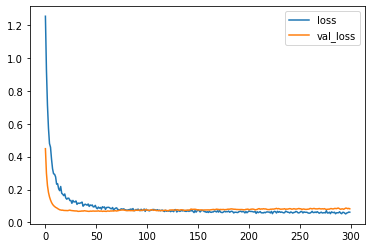

In [310]:
losses.plot()

In [311]:
predictions = model.predict_classes(X_val)

In [312]:
print(confusion_matrix(y_val,predictions))

[[419   6]
 [  6  11]]


In [313]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       425
           1       0.65      0.65      0.65        17

    accuracy                           0.97       442
   macro avg       0.82      0.82      0.82       442
weighted avg       0.97      0.97      0.97       442



300 epochs seems to work well. We will reduce this number to account for the smaller size of validation data during cross-validation. 

## 4.10. Neural Network Modeling - Final Model

Now that we have tuned the hyperparameters of the individual neural network, we will create a final "ensemble" of neural networks using cross-validation. The structure will strongly resemble that of the base model.

In [325]:
# Objects for cross-validation scoring
out_of_sample_y = [] 
out_of_sample_predictions = []

In [326]:
# Object for validation predictions
validation_predictions = []

In [327]:
# Performing semi-manual cross-validation
for sampling,testing in skf.split(X_train,y_train):
    # Generating in-sample and out-of-sample data
    X_sampling = X_train.iloc[sampling]
    y_sampling = y_train.iloc[sampling].values.ravel()
    X_testing = X_train.iloc[testing]
    y_testing = y_train.iloc[testing].values.ravel()
    
    # Feed-foward neural network
    model = Sequential()

    # input layer
    model.add(Dense(18,activation='selu',kernel_initializer=tf.keras.initializers.he_uniform()))
    model.add(Dropout(0.5)) 
    # hidden layer
    model.add(Dense(12,activation='selu',kernel_initializer=tf.keras.initializers.he_uniform()))
    model.add(Dropout(0.5))
    # output layer
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam')

    # Fitting the model
    model.fit(x=X_train,y=y_train.values.ravel(),epochs=200,validation_data=(X_val,y_val.values.ravel()),verbose=0)
    
    # Adding predictions for cross-validation score
    predictions = model.predict_classes(X_testing)
    out_of_sample_y.append(y_testing)
    out_of_sample_predictions.append(predictions)
    
    # Adding validation predictions
    predictions = model.predict_classes(X_val)
    validation_predictions.append(predictions)

In [328]:
# Cross-validation scoring
sum_f1_score = 0
max_f1_score = 0
for fold1,fold2 in zip(out_of_sample_y,out_of_sample_predictions):
    sum_f1_score += f1_score(fold1,fold2)
    if (f1_score(fold1,fold2)>max_f1_score):
        max_f1_score = f1_score(fold1,fold2)
mean_f1_score = sum_f1_score/10

In [329]:
mean_f1_score

0.713040293040293

In [330]:
max_f1_score

0.923076923076923

We will ensemble the validation predictions by taking the mode from all ten models for each instance. 

In [331]:
validation_predictions_final = pd.DataFrame(validation_predictions[0])
for num in range(1,10):
    validation_predictions_final = pd.concat([validation_predictions_final,pd.DataFrame(validation_predictions[num])],axis=1)

In [332]:
validation_predictions_final['Mode'] = validation_predictions_final.mode(axis=1)[0].astype('int')
validation_predictions_final = validation_predictions_final['Mode']

In [333]:
validation_predictions_final.head()

0    0
1    0
2    0
3    0
4    0
Name: Mode, dtype: int32

In [334]:
print(confusion_matrix(y_val,validation_predictions_final))

[[421   4]
 [  9   8]]


In [335]:
print(classification_report(y_val,validation_predictions_final))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       425
           1       0.67      0.47      0.55        17

    accuracy                           0.97       442
   macro avg       0.82      0.73      0.77       442
weighted avg       0.97      0.97      0.97       442



In order to obtain a concrete "best" model, we should likely not use an ensemble of ten neural networks. Let us identify which of the ten models has the highest score on the validation data, and we will choose it to be our best model. This procedure is similar to how we selected the best models for the other model types. 

In [336]:
curr_f1_score = 0
max_f1_score = 0

In [337]:
# Performing semi-manual cross-validation
for sampling,testing in skf.split(X_train,y_train):
    # Generating in-sample and out-of-sample data
    X_sampling = X_train.iloc[sampling]
    y_sampling = y_train.iloc[sampling].values.ravel()
    X_testing = X_train.iloc[testing]
    y_testing = y_train.iloc[testing].values.ravel()
    
    # Feed-foward neural network
    model = Sequential()

    # input layer
    model.add(Dense(18,activation='selu',kernel_initializer=tf.keras.initializers.he_uniform()))
    model.add(Dropout(0.5)) 
    # hidden layer
    model.add(Dense(12,activation='selu',kernel_initializer=tf.keras.initializers.he_uniform()))
    model.add(Dropout(0.5))
    # output layer
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam')

    # Fitting the model
    model.fit(x=X_train,y=y_train.values.ravel(),epochs=200,validation_data=(X_val,y_val.values.ravel()),verbose=0)
   
    predictions = model.predict_classes(X_val)

    curr_f1_score = f1_score(y_val,predictions)
    if (curr_f1_score>max_f1_score):
        max_f1_score = curr_f1_score
        nn_model_final = model

In [338]:
predictions = nn_model_final.predict_classes(X_val)

In [339]:
print(confusion_matrix(y_val,predictions))

[[422   3]
 [  6  11]]


In [340]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       425
           1       0.79      0.65      0.71        17

    accuracy                           0.98       442
   macro avg       0.89      0.82      0.85       442
weighted avg       0.98      0.98      0.98       442



## 4.11. Saving Models

Here are the models that performed best during cross-validation and validation: 
- Tuned k-nearest neighbors with tuned bagging
- Tuned support vector machine with tuned bagging
- Tuned AdaBoost
- Tuned gradient tree boosting
- Tuned XGBoost
- Voting classifier (soft)
- Voting classifier (hard)
- Stacking classifier
- Tuned neural network

We will save all of these models so that they can be evaluated on the test data in the next section. 

In [593]:
# Tuned k-nearest neighbors with tuned bagging
dump(knn_bagged_tuned,'./Models/knn')

['./Models/knn']

In [594]:
# Tuned support vector machine with tuned bagging
dump(svc_bagged_tuned,'./Models/svc')

['./Models/svc']

In [595]:
# Tuned AdaBoost
dump(ada_tuned,'./Models/ada')

['./Models/ada']

In [596]:
# Tuned gradient tree boosting
dump(gbc_tuned,'./Models/gbc')

['./Models/gbc']

In [597]:
# Tuned XGBoost
dump(xgb_tuned,'./Models/xgb')

['./Models/xgb']

In [598]:
# Voting classifier (soft)
dump(eclf_vc_soft,'./Models/vc_soft')

['./Models/vc_soft']

In [599]:
# Voting classifier (hard)
dump(eclf_vc_hard,'./Models/vc_hard')

['./Models/vc_hard']

In [600]:
# Stacking classifier
dump(eclf_sc,'./Models/sc')

['./Models/sc']

In [349]:
# Tuned neural network
nn_model_final.save('./Models/nn/')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./Models/nn/assets


## 4.12. Further Steps

In the next section, we will evaluate all of the saved models on the test data. Whichever model performs best will likely be chosen as the final model for this project. 